In [1]:
import os
import numpy as np
import pandas as pd

from quickstats.plots import UpperLimit1DPlot

# generate psuedo data
n_channels = 4
np.random.seed(1)
limits = np.sort(np.random.rand(n_channels, 6), axis=1)
index = [f'channel_{i}' for i in range(n_channels)]
columns = ['-2', '-1', '0', 'obs', '1', '2']
df = pd.DataFrame(limits, index=index, columns=columns)

In [2]:
df

-2        -1         0       obs         1         2
channel_0  0.000114  0.092339  0.146756  0.302333  0.417022  0.720324
channel_1  0.186260  0.345561  0.396767  0.419195  0.538817  0.685220
channel_2  0.027388  0.204452  0.417305  0.558690  0.670468  0.878117
channel_3  0.140387  0.198101  0.313424  0.692323  0.800745  0.968262

In [3]:
analysis_label_options = {
    'lumi': '140 fb$^{-1}$',
    'energy': '14 TeV'
}
label_map = {
    'channel_0': 'Channel 0',
    'channel_1': 'Channel 1',
    'channel_2': 'Channel 2',
    'channel_3': 'Channel 3',
}
plotter = UpperLimit1DPlot(
    df,
    label_map=label_map,
    analysis_label_options=analysis_label_options
)

In [4]:
plotter.draw(xlabel='95% CL Upper Limit on Signal Strength')

<Axes: xlabel='95% CL Upper Limit on Signal Strength'>

<Figure size 640x480 with 0 Axes>

In [7]:
# draw only certain targets
plotter.draw(targets=['channel_0', 'channel_1'],
             ypad=(0.02, 0.5),
             xlabel='95% CL Upper Limit on Signal Strength')

<Axes: xlabel='95% CL Upper Limit on Signal Strength'>

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='95% CL Upper Limit on Signal Strength'>

<Figure size 640x480 with 0 Axes>

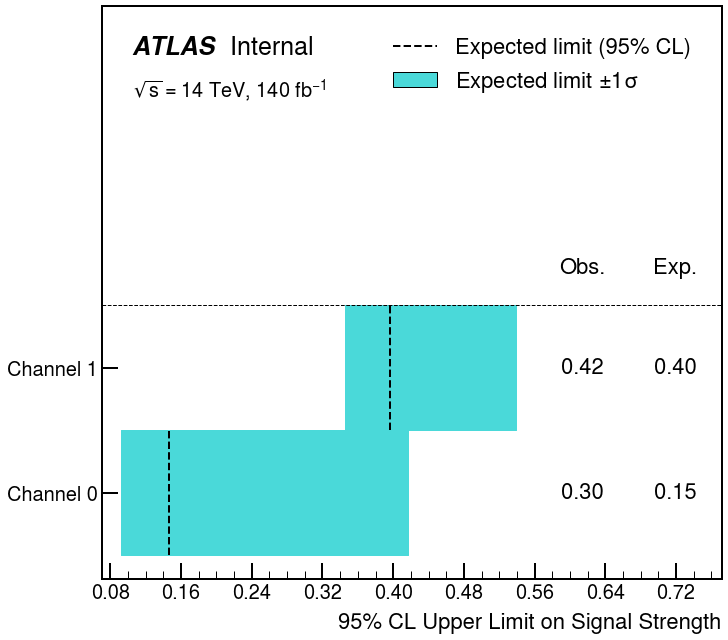

In [8]:
# draw only certain columns
plotter.draw(targets=['channel_0', 'channel_1'],
             columns=['expected', '1sigma'],
             ypad=(0.02, 0.5),
             xlabel='95% CL Upper Limit on Signal Strength')

<Axes: xlabel='95% CL Upper Limit on Signal Strength'>

<Figure size 640x480 with 0 Axes>

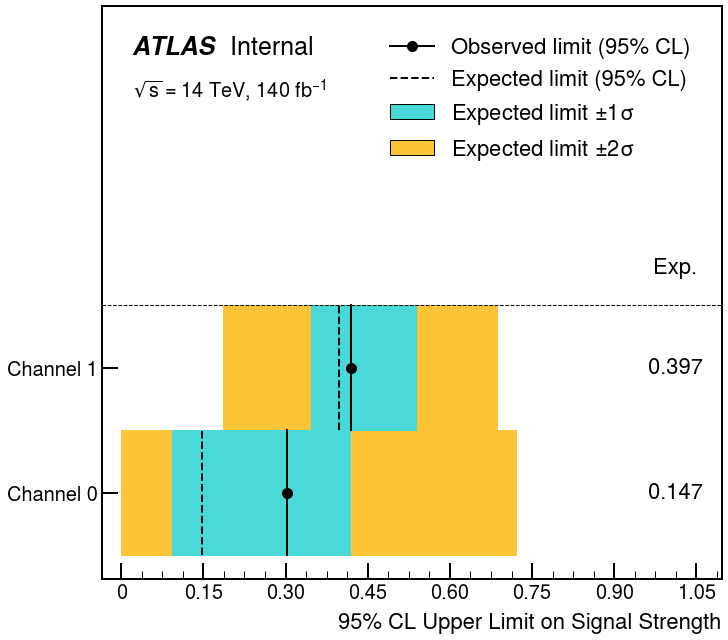

In [9]:
# draw only certain column values
plotter.draw(targets=['channel_0', 'channel_1'],
             value_columns=['expected'],
             value_fmt="{value:.3f}",
             ypad=(0.02, 0.5),
             xlabel='95% CL Upper Limit on Signal Strength')

In [10]:
plotter.add_reference_limit(
    0.5, 0.44, 0.56,
    label='Theory Prediction',
    plot_styles={'color': 'r'},
    fill_styles={'color': 'hh:darkpink', 'alpha':0.5, 'hatch': '//'}
)

In [11]:
plotter.artists

{'Theory Prediction': ErrorBand(label='Theory Prediction', styles_map={'plot': {'color': 'r'}, 'fill_between': {'color': 'hh:darkpink', 'alpha': 0.5, 'hatch': '//'}}, x=[0.5, 0.5], y=[0.0, 1.0], yerrlo=[0.0, 0.0], yerrhi=[1.0, 1.0], xerr=[0.44, 0.56])}

<Axes: xlabel='95% CL Upper Limit on Signal Strength'>

<Figure size 640x480 with 0 Axes>

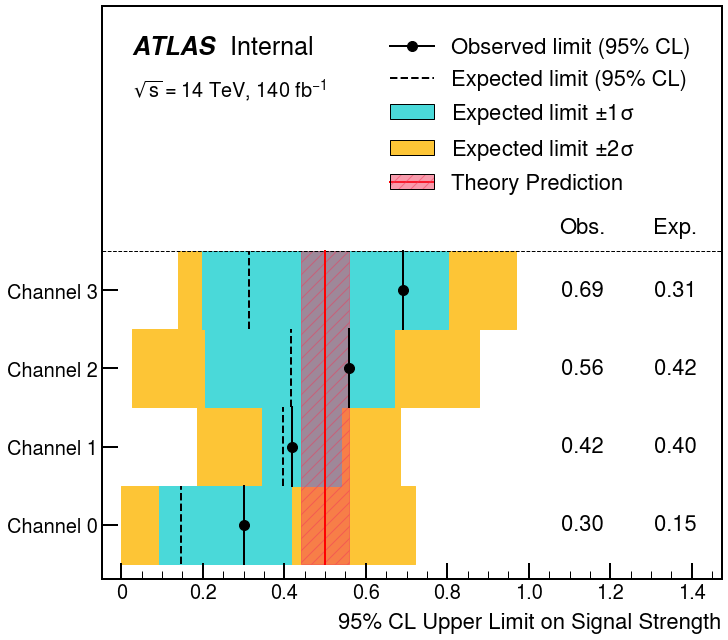

In [12]:
plotter.draw(xlabel='95% CL Upper Limit on Signal Strength', ypad=0.4)

In [13]:
plotter.reset_reference_limits()

<Axes: xlabel='95% CL Upper Limit on Signal Strength'>

<Figure size 640x480 with 0 Axes>

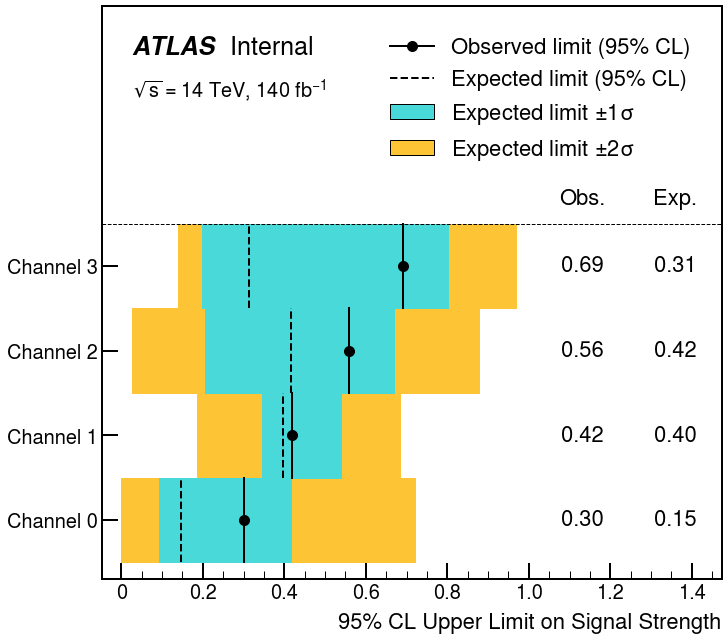

In [14]:
plotter.draw(xlabel='95% CL Upper Limit on Signal Strength', ypad=0.35)

In [23]:
# additional columns

# generate psuedo data
n_channels = 4
np.random.seed(1)
limits = np.sort(np.random.rand(n_channels, 7), axis=1)
index = [f'channel_{i}' for i in range(n_channels)]
columns = ['-2', '-1', 'stat', '0', 'obs', '1', '2']
df = pd.DataFrame(limits, index=index, columns=columns)

In [28]:
analysis_label_options = {
    'lumi': '140 fb$^{-1}$',
    'energy': '14 TeV'
}
styles_map = {
    'stat': {
        'plot': {
            'linestyle': '-.',
            'marker': '*'
        }
    }
}
label_map = {
    'channel_0': 'Channel 0',
    'channel_1': 'Channel 1',
    'channel_2': 'Channel 2',
    'channel_3': 'Channel 3',
    'legend.stat': 'Stat-only limit (95% CL)'
}
color_map = {
    'artist.stat': 'r',
    'artist.obs': 'b'
}

plotter = UpperLimit1DPlot(
    df,
    label_map=label_map,
    color_map=color_map,
    styles_map=styles_map,
    analysis_label_options=analysis_label_options
)

In [31]:
plotter.label_map

root: None
  legend: None
    2sigma: 'Expected limit $\\pm 2\\sigma$'
    1sigma: 'Expected limit $\\pm 1\\sigma$'
    expected: 'Expected limit (95% CL)'
    observed: 'Observed limit (95% CL)'
    stat: 'Stat-only limit (95% CL)'
  text: None
    expected: 'Exp.'
    observed: 'Obs.'
  channel_0: 'Channel 0'
  channel_1: 'Channel 1'
  channel_2: 'Channel 2'
  channel_3: 'Channel 3'

In [32]:
plotter.color_map

root: None
  artist: None
    2sigma: 'hh:darkyellow'
    1sigma: 'hh:lightturquoise'
    expected: 'k'
    observed: 'k'
    hline: 'k'
    stat: 'r'
    obs: 'b'

<Axes: xlabel='95% CL Upper Limit on Signal Strength'>

<Figure size 640x480 with 0 Axes>

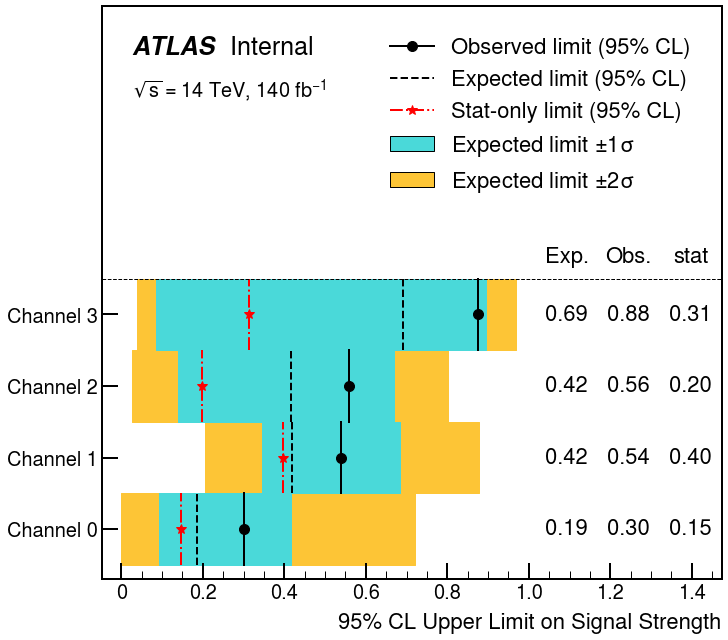

In [29]:
plotter.draw(xlabel='95% CL Upper Limit on Signal Strength',
             columns=('observed', 'expected', 'stat', '1sigma', '2sigma'),
             value_columns=('expected', 'observed', 'stat'),
             value_width=0.1,
             ypad=0.45)